In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

# 1. load dataset

In [4]:
df =pd.read_excel('Python_Project_7_KNN.xlsx')

In [5]:
df.head()  

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


# 2.  Check for the null values 

In [6]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

# 3. Get basic information from data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


# 4. Describe the dataset

In [9]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


# 5. Display scatterplot between age & Total work Experience

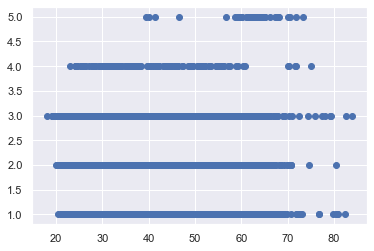

In [11]:
plt.scatter(df['Age'],df['Total Work Experience'])

# 6. Display box plot for age 

{'whiskers': [<matplotlib.lines.Line2D at 0x7bae718>,
 'caps': [<matplotlib.lines.Line2D at 0x7baea78>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bae550>],
 'medians': [<matplotlib.lines.Line2D at 0x7baedd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7baef88>],
 'means': []}

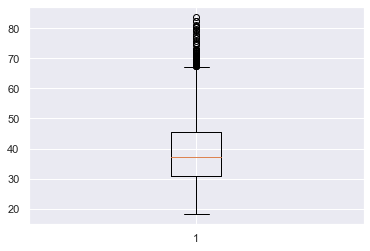

In [12]:
plt.boxplot(df['Age'])

# 7. Display box plot for Cibil score 

{'whiskers': [<matplotlib.lines.Line2D at 0x7be4c58>,
 'caps': [<matplotlib.lines.Line2D at 0x7be4fb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7be4a90>],
 'medians': [<matplotlib.lines.Line2D at 0xa312340>],
 'fliers': [<matplotlib.lines.Line2D at 0xa3124f0>],
 'means': []}

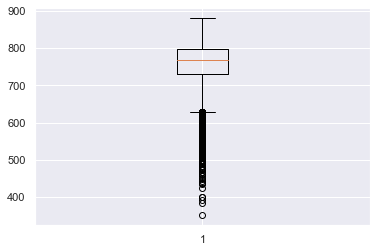

In [13]:
plt.boxplot(df['Cibil score'])

# 8. Create target and features data where target is Total bounces 
past12months

In [15]:
X = df.drop('Total bounces past12months',axis=1)
Y =df['Total bounces past12months']

In [17]:
X.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0


# Working with Model

1.Split data into training and testing sets 

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

2.Create a KNN classifier between Features and target data


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
clf =KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier()

3.Display the test,train score

In [21]:
clf.score(X_train,Y_train)

0.6775986659255142

In [22]:
clf.score(X_test,Y_test)

0.6448026681489717

In [23]:
Y_pred=clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

4.Print the accuracy score

In [25]:
accuracy_score(Y_test,Y_pred)

0.6448026681489717

# Try 1 to 14 k values for classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):
    
    
    model= KNeighborsClassifier(i)
    model.fit(X_train,Y_train)
    
    
    train_scores.append(model.score(X_train,Y_train))
    test_scores.append(model.score(X_test,Y_test))

# Display training and testing score for all the 1 to 14 k value

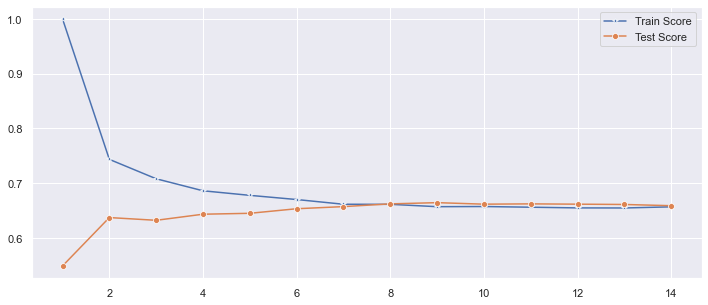

In [27]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')